In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [164]:
train = pd.read_excel('Final_Train.xlsx')

In [165]:
train.shape

(5961, 7)

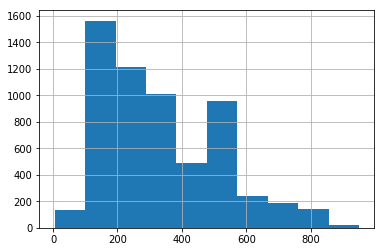

In [166]:
train['Fees'].hist(bins=10)

In [167]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [168]:
train.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [169]:
train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [170]:
train['years_of_exp'] = train['Experience'].str.slice(stop=2).astype(int)

In [171]:
train.describe()

,Fees,years_of_exp
count,5961.000000,5961.000000
mean,307.944640,17.303976
std,190.920373,11.142798
min,5.000000,0.000000
25%,150.000000,9.000000
50%,300.000000,14.000000
75%,500.000000,23.000000
max,950.000000,66.000000


In [172]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,years_of_exp
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [173]:
train['City'] = train['Place'].str.split(',').str[1]
train['Locality'] = train['Place'].str.split(',').str[0]

In [174]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,years_of_exp,City,Locality
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,Bangalore,Bannerghatta Road
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,Chennai,Keelkattalai


In [175]:
train['Qualifi_1'] = train['Qualification'].str.split(',').str[0]
train['Qualifi_2'] = train['Qualification'].str.split(',').str[1]
train['Qualifi_3'] = train['Qualification'].str.split(',').str[2]

In [176]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,years_of_exp,City,Locality,Qualifi_1,Qualifi_2,Qualifi_3
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,NaN
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,NaN
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,NaN
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,NaN
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20,Chennai,Keelkattalai,BAMS,NaN,NaN


In [177]:
train['Misc'] = train['Miscellaneous_Info'].str.split('%').str[0]

train['Misc_len'] = train['Misc'].str.len()

train.loc[train['Misc_len']>3, 'Misc'] = 0

train['Misc'].fillna(0,inplace = True)

train['Misc'] = train['Misc'].astype(int)

train['Misc_2'] = train['Miscellaneous_Info'].str.split('% ').str[1]

train['Misc_3'] = train['Misc_2'].str.split(' ').str[0]

train['Misc_3'].fillna(0,inplace = True)

train['Misc_3_len'] = train['Misc_3'].str.len()

train.loc[train['Misc_3_len']>3, 'Misc_3'] = 0

train.loc[train['Misc_3']==',', 'Misc_3'] = 0

train['Misc_3'] = train['Misc_3'].astype(int)

train['Fees1'] = train['Fees']

train = train.drop(['Fees'],axis=1)

In [178]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,years_of_exp,City,Locality,Qualifi_1,Qualifi_2,Qualifi_3,Misc,Misc_len,Misc_2,Misc_3,Misc_3_len,Fees1
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",24,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,NaN,100,3.0,"16 Feedback Kakkanad, Ernakulam",16,2.0,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",12,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,NaN,98,2.0,"76 Feedback Whitefield, Bangalore",76,2.0,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,9,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,NaN,0,NaN,NaN,0,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",12,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,NaN,0,58.0,NaN,0,NaN,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",20,Chennai,Keelkattalai,BAMS,NaN,NaN,100,3.0,"4 Feedback Keelkattalai, Chennai",4,1.0,250


In [179]:
train['Misc_4'] = train['Misc']*np.log((1+train['Misc_3']))

In [180]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,years_of_exp,City,Locality,Qualifi_1,Qualifi_2,Qualifi_3,Misc,Misc_len,Misc_2,Misc_3,Misc_3_len,Fees1,Misc_4
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",24,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,NaN,100,3.0,"16 Feedback Kakkanad, Ernakulam",16,2.0,100,283.321334
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",12,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,NaN,98,2.0,"76 Feedback Whitefield, Bangalore",76,2.0,350,425.692931
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,9,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,NaN,0,NaN,NaN,0,NaN,300,0.000000
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",12,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,NaN,0,58.0,NaN,0,NaN,250,0.000000
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",20,Chennai,Keelkattalai,BAMS,NaN,NaN,100,3.0,"4 Feedback Keelkattalai, Chennai",4,1.0,250,160.943791


In [181]:
train['Rating'].fillna('0%',inplace = True)

In [182]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,years_of_exp,City,Locality,Qualifi_1,Qualifi_2,Qualifi_3,Misc,Misc_len,Misc_2,Misc_3,Misc_3_len,Fees1,Misc_4
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",24,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,NaN,100,3.0,"16 Feedback Kakkanad, Ernakulam",16,2.0,100,283.321334
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",12,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,NaN,98,2.0,"76 Feedback Whitefield, Bangalore",76,2.0,350,425.692931
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0%,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,9,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,NaN,0,NaN,NaN,0,NaN,300,0.000000
3,"BSc - Zoology, BAMS",12 years experience,0%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",12,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,NaN,0,58.0,NaN,0,NaN,250,0.000000
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",20,Chennai,Keelkattalai,BAMS,NaN,NaN,100,3.0,"4 Feedback Keelkattalai, Chennai",4,1.0,250,160.943791
5,BAMS,8 years experience,0%,"Porur, Chennai",Ayurveda,NaN,8,Chennai,Porur,BAMS,NaN,NaN,0,NaN,NaN,0,NaN,100,0.000000
6,BHMS,42 years experience,0%,"Karol Bagh, Delhi",Homeopath,NaN,42,Delhi,Karol Bagh,BHMS,NaN,NaN,0,NaN,NaN,0,NaN,200,0.000000
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,10,Bangalore,Arekere,BDS,NaN,NaN,0,79.0,NaN,0,NaN,200,0.000000
8,"MBBS, MD - General Medicine",14 years experience,0%,"Old City, Hyderabad",General Medicine,NaN,14,Hyderabad,Old City,MBBS,MD - General Medicine,NaN,0,NaN,NaN,0,NaN,100,0.000000
9,"BSc, BDS",23 years experience,0%,"Athani, Ernakulam",Dentist,NaN,23,Ernakulam,Athani,BSc,BDS,NaN,0,NaN,NaN,0,NaN,100,0.000000


In [183]:
train['Rating'] = train['Rating'].str.slice(stop=-1).astype(int)

In [184]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,years_of_exp,City,Locality,Qualifi_1,Qualifi_2,Qualifi_3,Misc,Misc_len,Misc_2,Misc_3,Misc_3_len,Fees1,Misc_4
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",24,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,NaN,100,3.0,"16 Feedback Kakkanad, Ernakulam",16,2.0,100,283.321334
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",12,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,NaN,98,2.0,"76 Feedback Whitefield, Bangalore",76,2.0,350,425.692931
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,9,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,NaN,0,NaN,NaN,0,NaN,300,0.000000
3,"BSc - Zoology, BAMS",12 years experience,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",12,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,NaN,0,58.0,NaN,0,NaN,250,0.000000
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",20,Chennai,Keelkattalai,BAMS,NaN,NaN,100,3.0,"4 Feedback Keelkattalai, Chennai",4,1.0,250,160.943791
5,BAMS,8 years experience,0,"Porur, Chennai",Ayurveda,NaN,8,Chennai,Porur,BAMS,NaN,NaN,0,NaN,NaN,0,NaN,100,0.000000
6,BHMS,42 years experience,0,"Karol Bagh, Delhi",Homeopath,NaN,42,Delhi,Karol Bagh,BHMS,NaN,NaN,0,NaN,NaN,0,NaN,200,0.000000
7,BDS,10 years experience,99,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,10,Bangalore,Arekere,BDS,NaN,NaN,0,79.0,NaN,0,NaN,200,0.000000
8,"MBBS, MD - General Medicine",14 years experience,0,"Old City, Hyderabad",General Medicine,NaN,14,Hyderabad,Old City,MBBS,MD - General Medicine,NaN,0,NaN,NaN,0,NaN,100,0.000000
9,"BSc, BDS",23 years experience,0,"Athani, Ernakulam",Dentist,NaN,23,Ernakulam,Athani,BSc,BDS,NaN,0,NaN,NaN,0,NaN,100,0.000000


In [185]:
train['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', nan, ' Sector 5'],
      dtype=object)

In [186]:
train['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [187]:
train.dtypes

Qualification          object
Experience             object
Rating                  int32
Place                  object
Profile                object
Miscellaneous_Info     object
years_of_exp            int32
City                   object
Locality               object
Qualifi_1              object
Qualifi_2              object
Qualifi_3              object
Misc                    int32
Misc_len              float64
Misc_2                 object
Misc_3                  int32
Misc_3_len            float64
Fees1                   int64
Misc_4                float64
dtype: object

In [188]:
from sklearn.preprocessing import LabelEncoder

In [189]:
train['City'].fillna("abc",inplace = True)
train['Locality'].fillna("abc",inplace = True)
train['Qualification'].fillna("abc",inplace = True)
train['Profile'].fillna("abc",inplace = True)
train['Qualifi_1'].fillna("abc",inplace = True)
train['Qualifi_2'].fillna("abc",inplace = True)
train['Qualifi_3'].fillna("abc",inplace = True)

In [190]:
train

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,years_of_exp,City,Locality,Qualifi_1,Qualifi_2,Qualifi_3,Misc,Misc_len,Misc_2,Misc_3,Misc_3_len,Fees1,Misc_4
0,"BHMS, MD - Homeopathy",24 years experience,100,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",24,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,abc,100,3.0,"16 Feedback Kakkanad, Ernakulam",16,2.0,100,283.321334
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",12,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,abc,98,2.0,"76 Feedback Whitefield, Bangalore",76,2.0,350,425.692931
2,"MBBS, MS - Otorhinolaryngology",9 years experience,0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,9,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,abc,0,NaN,NaN,0,NaN,300,0.000000
3,"BSc - Zoology, BAMS",12 years experience,0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",12,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,abc,0,58.0,NaN,0,NaN,250,0.000000
4,BAMS,20 years experience,100,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",20,Chennai,Keelkattalai,BAMS,abc,abc,100,3.0,"4 Feedback Keelkattalai, Chennai",4,1.0,250,160.943791
5,BAMS,8 years experience,0,"Porur, Chennai",Ayurveda,NaN,8,Chennai,Porur,BAMS,abc,abc,0,NaN,NaN,0,NaN,100,0.000000
6,BHMS,42 years experience,0,"Karol Bagh, Delhi",Homeopath,NaN,42,Delhi,Karol Bagh,BHMS,abc,abc,0,NaN,NaN,0,NaN,200,0.000000
7,BDS,10 years experience,99,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,10,Bangalore,Arekere,BDS,abc,abc,0,79.0,NaN,0,NaN,200,0.000000
8,"MBBS, MD - General Medicine",14 years experience,0,"Old City, Hyderabad",General Medicine,NaN,14,Hyderabad,Old City,MBBS,MD - General Medicine,abc,0,NaN,NaN,0,NaN,100,0.000000
9,"BSc, BDS",23 years experience,0,"Athani, Ernakulam",Dentist,NaN,23,Ernakulam,Athani,BSc,BDS,abc,0,NaN,NaN,0,NaN,100,0.000000


In [191]:
lb_City = LabelEncoder()
train["City_code"] = lb_City.fit_transform(train["City"])

lb_Locality = LabelEncoder()
train["Locality_code"] = lb_Locality.fit_transform(train["Locality"])

lb_qual_1 = LabelEncoder()
train["Qual_1_code"] = lb_Locality.fit_transform(train["Qualifi_1"])


In [192]:
x = train.loc[train['Qualifi_1'] == 'Get inspired by remarkable stories of people like you', 'Qual_1_code']

In [193]:
lb_qual_2 = LabelEncoder()
train["Qual_2_code"] = lb_Locality.fit_transform(train["Qualifi_2"])

lb_qual_3 = LabelEncoder()
train["Qual_3_code"] = lb_Locality.fit_transform(train["Qualifi_3"])

lb_Profile = LabelEncoder()
train["Profile_code"] = lb_Locality.fit_transform(train["Profile"])

In [194]:
train.dtypes

Qualification          object
Experience             object
Rating                  int32
Place                  object
Profile                object
Miscellaneous_Info     object
years_of_exp            int32
City                   object
Locality               object
Qualifi_1              object
Qualifi_2              object
Qualifi_3              object
Misc                    int32
Misc_len              float64
Misc_2                 object
Misc_3                  int32
Misc_3_len            float64
Fees1                   int64
Misc_4                float64
City_code               int64
Locality_code           int64
Qual_1_code             int64
Qual_2_code             int64
Qual_3_code             int64
Profile_code            int64
dtype: object

In [195]:
np.where(train.dtypes != np.float)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 17, 19,
       20, 21, 22, 23, 24], dtype=int64)

In [196]:
train_xgb = train[['Qual_1_code','Qual_2_code','Qual_3_code','years_of_exp', 'Rating','Profile_code','Locality_code','City_code','Misc_4','Fees1']]

In [197]:
train_xgb

,Qual_1_code,Qual_2_code,Qual_3_code,years_of_exp,Rating,Profile_code,Locality_code,City_code,Misc_4,Fees1
0,8,252,406,24,100,5,296,4,283.321334,100
1,5,241,406,12,98,0,855,0,425.692931,350
2,79,334,406,9,0,3,452,0,0.000000,300
3,12,7,406,12,0,0,68,0,0.000000,250
4,5,426,406,20,100,0,335,1,160.943791,250
5,5,426,406,8,0,0,604,1,0.000000,100
6,8,426,406,42,0,5,324,3,0.000000,200
7,6,426,406,10,99,1,33,0,0.000000,200
8,79,249,406,14,0,4,540,5,0.000000,100
9,11,8,406,23,0,1,39,4,0.000000,100


In [198]:
X = train_xgb.iloc[:,:-1] #df_xgb = df[['Qual_1_code','Qual_3_code','years_of_exp','Locality_code','Misc_4','Fees1']]
y = train_xgb.iloc[:,-1]

In [199]:
X

,Qual_1_code,Qual_2_code,Qual_3_code,years_of_exp,Rating,Profile_code,Locality_code,City_code,Misc_4
0,8,252,406,24,100,5,296,4,283.321334
1,5,241,406,12,98,0,855,0,425.692931
2,79,334,406,9,0,3,452,0,0.000000
3,12,7,406,12,0,0,68,0,0.000000
4,5,426,406,20,100,0,335,1,160.943791
5,5,426,406,8,0,0,604,1,0.000000
6,8,426,406,42,0,5,324,3,0.000000
7,6,426,406,10,99,1,33,0,0.000000
8,79,249,406,14,0,4,540,5,0.000000
9,11,8,406,23,0,1,39,4,0.000000


In [200]:
y

0       100
1       350
2       300
3       250
4       250
5       100
6       200
7       200
8       100
9       100
10      700
11      100
12      200
13      350
14      500
15      200
16      100
17      300
18      400
19      150
20      100
21      500
22      200
23      100
24      100
25      100
26      500
27      250
28      100
29      500
       ... 
5931    300
5932    100
5933    500
5934    100
5935    300
5936    100
5937    400
5938    300
5939    400
5940    800
5941    300
5942    450
5943    300
5944    200
5945    150
5946    300
5947    100
5948    100
5949    400
5950    350
5951    200
5952    100
5953    100
5954    300
5955    300
5956    300
5957    100
5958    600
5959    100
5960    200
Name: Fees1, Length: 5961, dtype: int64

In [201]:
import socket
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [202]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [203]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [204]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, n_estimators = 10)

In [205]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [206]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 209.766005


In [207]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                   num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=40)

[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=5
[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20 extra nodes, 0 pruned nodes, max_depth=5
[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 34 extra nodes, 0 pruned nodes, max_depth=5
[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 40 extra nodes, 0 pruned nodes, max_depth=5
[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 36 extra nodes, 0 pruned nodes, max_depth=5
[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_

[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 46 extra nodes, 0 pruned nodes, max_depth=5
[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[16:34:49] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_

In [208]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,335.156433,1.160377,335.282989,2.670433
1,312.041565,1.182238,312.281860,2.631982
2,291.688070,1.201396,291.983246,2.505614
3,273.979665,1.135434,274.481415,2.563774
4,258.558207,1.056020,259.209320,2.620701


In [209]:
print((cv_results["test-rmse-mean"]).tail(1))

49    170.113703
Name: test-rmse-mean, dtype: float64


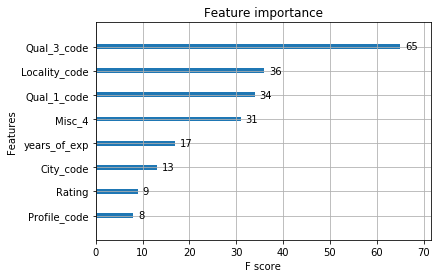

In [210]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [211]:
df_test=pd.read_excel('Final_Test.xlsx')

In [212]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [213]:
df_test['years_of_exp'] = df_test['Experience'].str.slice(stop=2).astype(int)

In [214]:
df_test['City'] = df_test['Place'].str.split(',').str[1]
df_test['Locality'] = df_test['Place'].str.split(',').str[0]

In [215]:
df_test['Rating'].fillna('95%',inplace = True)
df_test['Rating'] = df_test['Rating'].str.slice(stop=-1).astype(int)

In [216]:
df_test['Qualifi_1'] = train['Qualification'].str.split(',').str[0]
df_test['Qualifi_2'] = train['Qualification'].str.split(',').str[1]
df_test['Qualifi_3'] = train['Qualification'].str.split(',').str[2]

In [217]:
df_test['City'].fillna("abc",inplace = True)
df_test['Locality'].fillna("abc",inplace = True)
df_test['Qualifi_1'].fillna("abc",inplace = True)
df_test['Qualifi_2'].fillna("abc",inplace = True)
df_test['Qualifi_3'].fillna("abc",inplace = True)
df_test['Profile'].fillna("abc",inplace = True)

In [218]:
df_test['Misc'] = df_test['Miscellaneous_Info'].str.split('%').str[0]

df_test['Misc_len'] = df_test['Misc'].str.len()

df_test.loc[df_test['Misc_len']>3, 'Misc'] = 0

df_test['Misc'].fillna(0,inplace = True)

df_test['Misc'] = df_test['Misc'].astype(int)

df_test['Misc_2'] = df_test['Miscellaneous_Info'].str.split('% ').str[1]

df_test['Misc_3'] = df_test['Misc_2'].str.split(' ').str[0]

df_test['Misc_3'].fillna(0,inplace = True)

df_test['Misc_3_len'] = df_test['Misc_3'].str.len()

df_test.loc[df_test['Misc_3_len']>3, 'Misc_3'] = 0

df_test.loc[df_test['Misc_3']==',', 'Misc_3'] = 0

df_test['Misc_3'] = df_test['Misc_3'].astype(int)

In [219]:
df_test['Misc_4'] = df_test['Misc']*np.log(1+train['Misc_3'])

In [220]:
lb_City = LabelEncoder()
df_test["City_code"] = lb_City.fit_transform(df_test["City"])


lb_Locality = LabelEncoder()
df_test["Locality_code"] = lb_Locality.fit_transform(df_test["Locality"])

lb_qual_1 = LabelEncoder()
df_test["Qual_1_code"] = lb_Locality.fit_transform(df_test["Qualifi_1"])

lb_qual_2 = LabelEncoder()
df_test["Qual_2_code"] = lb_Locality.fit_transform(df_test["Qualifi_2"])


lb_qual_3 = LabelEncoder()
df_test["Qual_3_code"] = lb_Locality.fit_transform(df_test["Qualifi_3"])



In [221]:
x = df_test.loc[train['Qualifi_1'] == 'Get inspired by remarkable stories of people like you', 'Qual_1_code']

In [222]:
lb_Profile = LabelEncoder()
df_test["Profile_code"] = lb_Locality.fit_transform(df_test["Profile"])

In [223]:
df_test_xgb = df_test[['Qual_1_code','Qual_3_code','years_of_exp','Locality_code','Misc_4']]

In [224]:
df_test_xgb = df_test[['Qual_1_code','Qual_2_code','Qual_3_code','years_of_exp', 'Rating','Profile_code','Locality_code','City_code','Misc_4']]

In [225]:
preds_1 = xg_reg.predict(df_test_xgb)

In [226]:
preds_1

array([224.85716, 247.25084, 255.45134, ..., 235.61955, 234.96193,
       247.96045], dtype=float32)

In [227]:
df_test_xgb['Fees'] = preds_1

C:\Users\uer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [228]:
df_test_xgb.head()

,Qual_1_code,Qual_2_code,Qual_3_code,years_of_exp,Rating,Profile_code,Locality_code,City_code,Misc_4,Fees
0,4,138,191,35,95,4,142,6,0.0,224.857162
1,2,130,191,31,95,3,577,5,0.0,247.250839
2,41,196,191,40,70,2,212,1,0.0,255.451340
3,7,3,191,0,95,0,373,3,0.0,213.549454
4,2,237,191,16,100,1,231,0,0.0,212.669418


In [229]:
df_test_xgb.loc[df_test['Qual_1_code'] == 38, 'Fees'] = 100

C:\Users\uer\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [230]:
df_test_xgb.to_excel('submission17.xlsx')

In [233]:
train.to_excel('df_train.xlsx')